In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib
import graphviz
from IPython.display import display,HTML,Image
from IPython.display import Markdown as md
from diagrams import Diagram,Cluster,Edge
from diagrams import aws
from diagrams.aws import analytics as aws_analytics
from diagrams.aws import network as aws_network
from diagrams.aws import compute as aws_compute
from diagrams.aws import database as aws_database
from diagrams.onprem import vcs
import fcgadgets.bc1ha.bc1ha_utils as u1ha
import fcgadgets.bc1ha.bc1ha_plot as p1ha
import fcgadgets.cbrunner.cbrun as cbr
import fcgadgets.cbrunner.cbrun_util as cbu
import fcgadgets.macgyver.util_fcs_graphs as ufcs
import fcgadgets.macgyver.util_fcs_qa as qa
import fcgadgets.macgyver.util_general as gu
import fcgadgets.macgyver.util_gis as gis
import fcgadgets.macgyver.util_inventory as uinv
import fcgadgets.macgyver.util_demo as udem
import fcgadgets.gaia.gaia_util as gaia

In [2]:
# Export
# jupyter nbconvert "G:\My Drive\Code_Python\bcfcs\FCS_Harvest.ipynb" --to=html --TemplateExporter.exclude_input=True

In [3]:
# Prepare session
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
display(HTML("<style>.container { width:80% !important; } .output {align-items:center; }</style>"))
warnings.filterwarnings('ignore')

In [4]:
# Import project information
meta=u1ha.Init()
meta=u1ha.ImportLUTs(meta)
meta['Paths']['Text']={'Text':r'C:\Users\rhember\OneDrive - Government of BC\Manuscripts\BC Forest Carbon Summary\BC FCS 06 Harvesting.docx'}

In [5]:
# Import geospatial data
roi={'Type':'Prov','Name':'Prov'}
meta['Graphics']['Map']['RGSF']=5 # Reduce resolution of maps to preserve memory
gdf_prov=u1ha.Import_GDBs_ProvinceWide(meta)
roi=u1ha.DefineROI(meta,roi,gdf_prov)
#roi=u1ha.Import_Raster(meta,roi,['lc_comp1_2019'])

In [6]:
txt=ufcs.ImportText(meta,'Text')
txt=ufcs.AddParagraphs(txt,4)

In [7]:
txt=ufcs.AddParagraphs(txt,2)

In [8]:
txt=ufcs.AddParagraphs(txt,2)

In [9]:
txt=ufcs.AddParagraphs(txt,9)

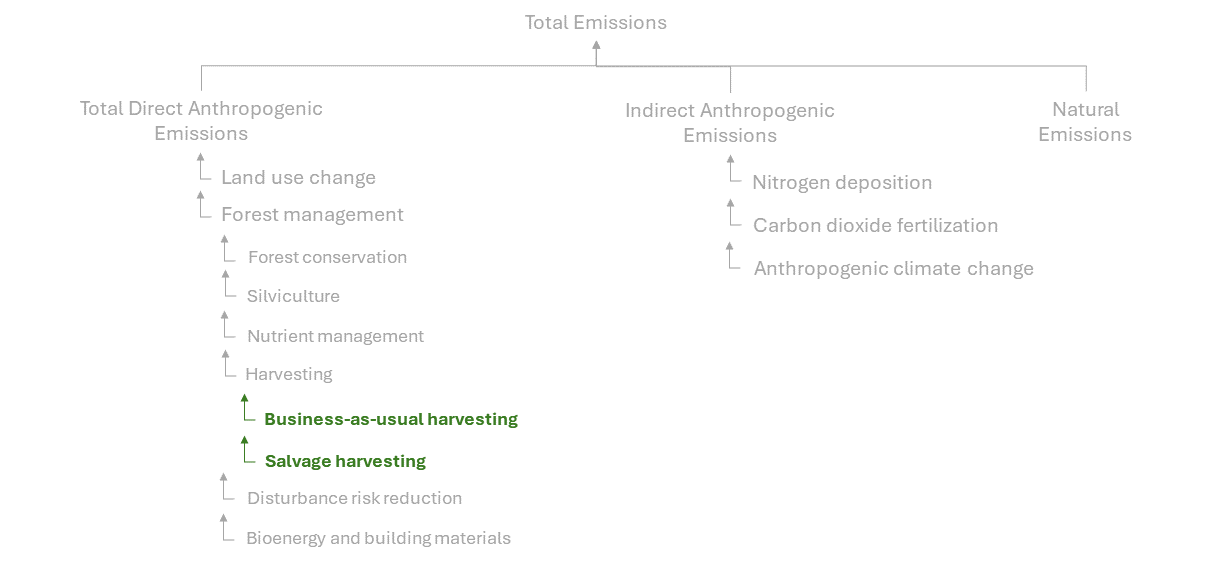

<b>Figure 1</b>. The harvesting action category as it relates to estimation of total direct anthropogenic emissions.

In [10]:
display(Image(filename='Taxonomy Harvesting.png',width=1000))
meta=ufcs.FigureCaption(meta,'The harvesting action category as it relates to estimation of total direct anthropogenic emissions.')

In [11]:
txt=ufcs.AddParagraphs(txt,3)

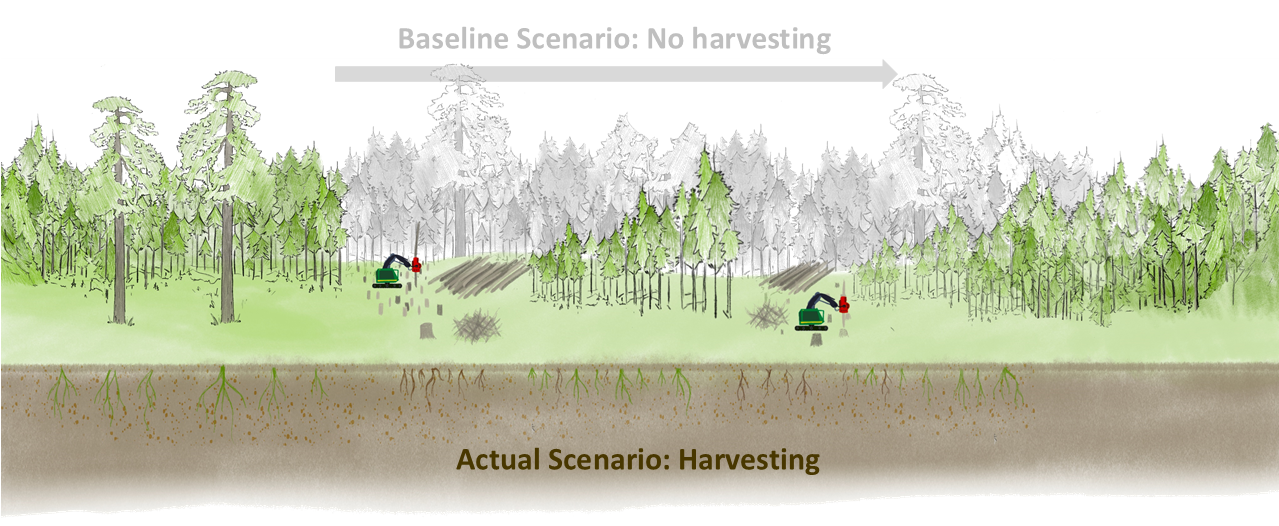

<b>Figure 2</b>. Illustration of scenarios.

In [12]:
display(Image(filename='Harvest Scenario Illustration.png',width=1200))
meta=ufcs.FigureCaption(meta,'Illustration of scenarios.')

In [13]:
# Import data
pNam='Demo_Harv_Clearcut'
pth=r'D:\Modelling Projects\Demo_Harv_Clearcut\Inputs\Metadata.pkl'
meta=gu.ipickle(pth)
tv=np.arange(meta[pNam]['Project']['Year Start Saving'],meta[pNam]['Project']['Year End']+1,1)
mos=cbu.Import_MOS_ByScnAndStrata_GHGEcon(meta,pNam)
mos[pNam]['Delta']={}
mos[pNam]['Delta']['Interior']={'iB':0,'iP':1}
mos[pNam]['Delta']['Coast']={'iB':2,'iP':3}
mos=cbu.Import_MOS_ByScnComparisonAndStrata(meta,pNam,mos)
mos=gaia.Calc_RF_FAIR(meta,pNam,mos)
iPS=0; iSS=0; iYS=0

Running 66 projections in parallel:   0%|          | 0/400 [00:00<?, ?timesteps/s]

Running 66 projections in parallel:   0%|          | 0/400 [00:00<?, ?timesteps/s]

Running 66 projections in parallel:   0%|          | 0/400 [00:00<?, ?timesteps/s]

Running 66 projections in parallel:   0%|          | 0/400 [00:00<?, ?timesteps/s]

Running 66 projections in parallel:   0%|          | 0/400 [00:00<?, ?timesteps/s]

In [52]:
#%% Export tables for each scenario
tbs=udem.Export_Summary_Tables(meta,pNam,mos)

In [14]:
# Graphic settings
t0=1850
t1=2150
cNam='Coast'

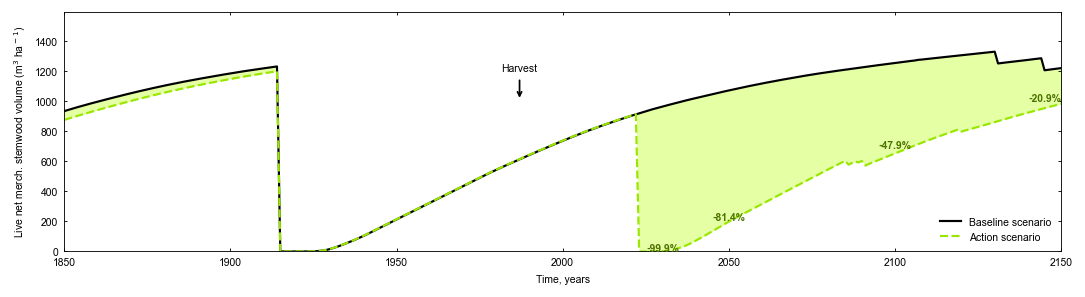

In [27]:
# Volume
td={'Year':np.array([2030,2050,2100,2145])}
udem.PlotVolumeMerchLive(meta,pNam,mos,cNam=cNam,t0=t0,t1=t1,OperSpace='Mean',ScenarioLabels=['Baseline scenario','Action scenario'],
                         LegendLoc='lower right',FigSize=[22,6],TextDelta=td,FillDelta='On')

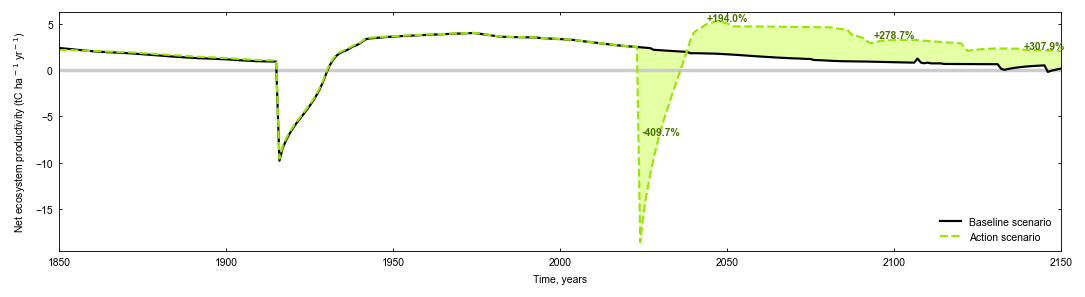

In [26]:
td={'Year':np.array([2030,2050,2100,2145])}
udem.PlotNEP(meta,pNam,mos,cNam=cNam,t0=t0,t1=t1,OperSpace='Mean',ScenarioLabels=['Baseline scenario','Action scenario'],LegendLoc='lower right',
             FigSize=[22,6],TextDelta=td,FillDelta='On')

In [28]:
# Pools
#td={'Year':np.array([2030,2050,2100,2145]),'Units':'Actual'}
#udem.PlotPools(meta,mos,pNam,cNam=cNam,t0=t0,t1=t1,OperSpace='Mean',ScenarioLabels=['Baseline scenario','Action scenario'],LegendLoc='lower right',FigSize=[22,16],TextDelta=td)

In [29]:
# Fluxes
#plt.close('all')
#td={'Year':np.array([2100]),'Units':'Actual'}
#udem.PlotFluxes(meta,mos,pNam,cNam=cNam,t0=t0,t1=t1,OperSpace='Mean',ScenarioLabels=['Baseline scenario','Action scenario'],LegendLoc='lower right',FigSize=[22,16],TextDelta=td)

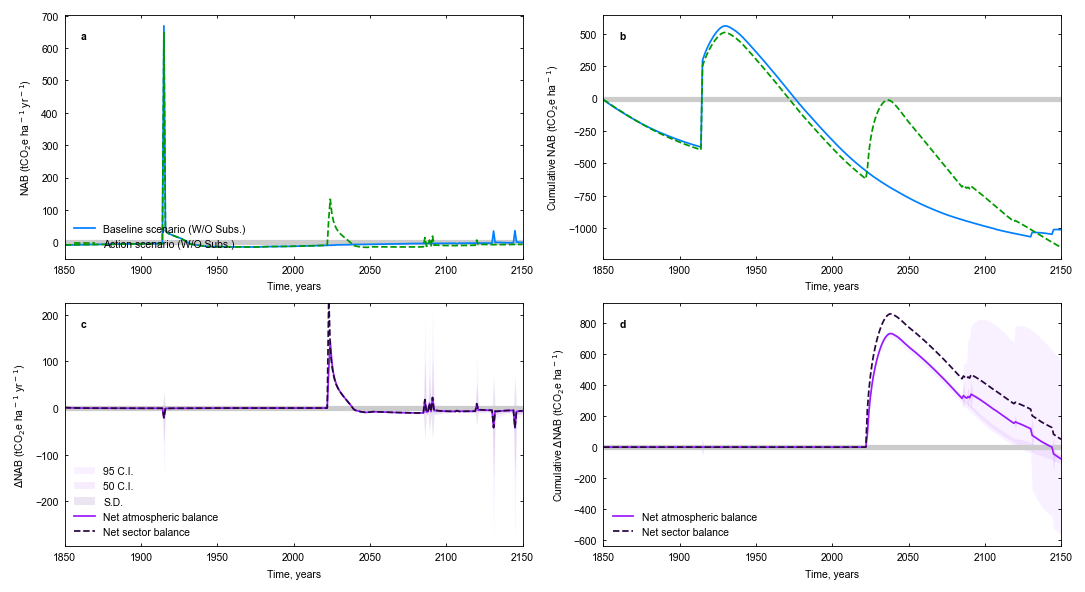

In [30]:
# Delta GHG balance
udem.PlotDeltaGHGB(meta,mos,pNam,cNam=cNam,t0=t0,t1=t1,OperSpace='Mean',ScenarioLabels=['Baseline scenario','Action scenario'],LegendLoc='lower left',
                   FigSize=[22,12])

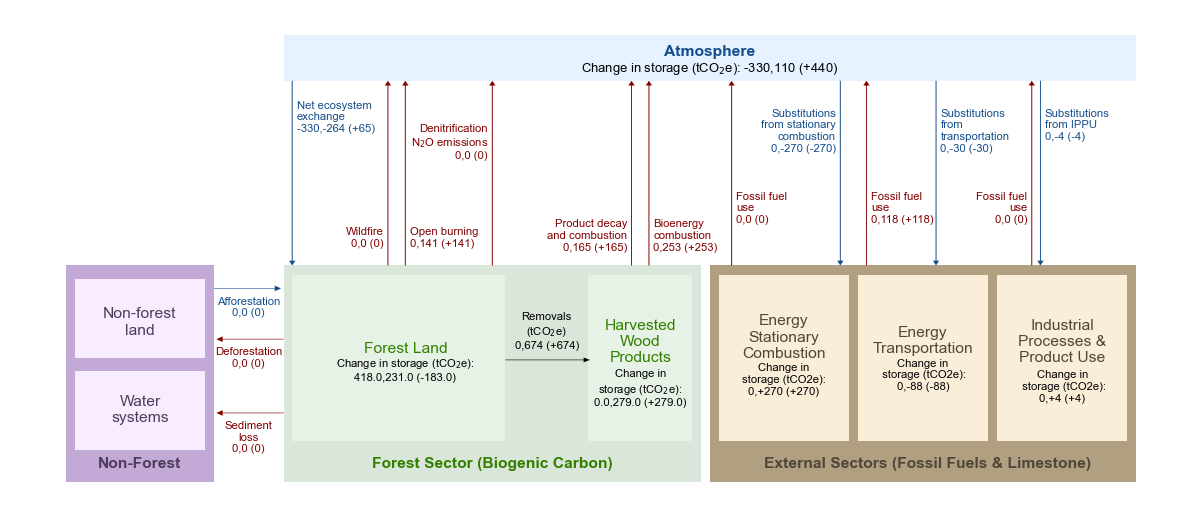

In [20]:
#%% Schematic GHG balance
ax=udem.PlotSchematicBalance(meta,pNam,mos,cNam=cNam,t0=meta[pNam]['Project']['Year Project'],t1=meta[pNam]['Project']['Year Project']+50)

In [59]:
# Cashflow
#udem.PlotCashflow(meta,pNam,mos,cNam=cNam,t0=t0,t1=t1)

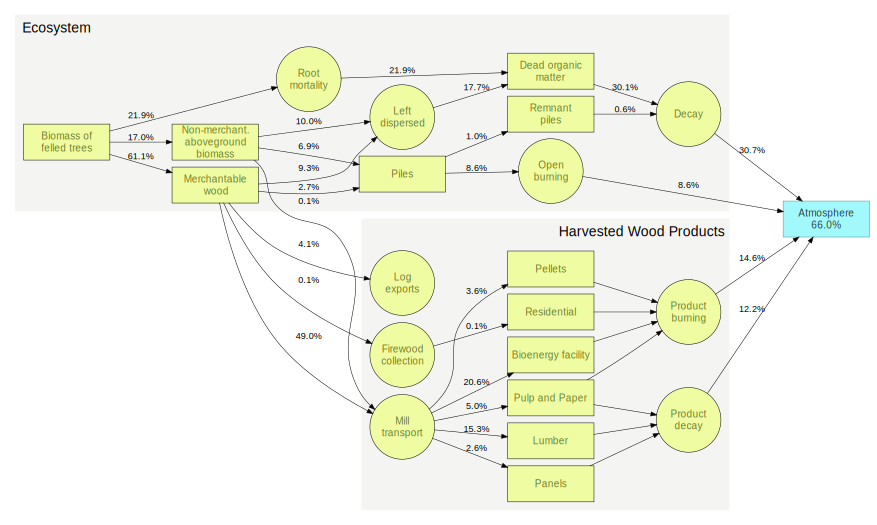

In [22]:
# Harvest flow schematic
iScn=3
d=cbu.LoadSingleOutputFile(meta,'Demo_Harv_Clearcut',iScn,0,0)
iS=0
iH=np.where(d['C_Felled'][:,iS]>0)[0][0]
TimeHorizon=50
ufcs.Plot_QA_FateOfFelled(meta,d,iS,iH,TimeHorizon)

In [60]:
# Benchmarking cashflow
d={}
tNam='Sum_t-5_to_t+10'
for cNam in tbs['Scenario Comparison'].keys():
    d[cNam]={}
    d[cNam]['Cost (CAD/m3)']=np.round(tbs['Scenario Comparison'][cNam][tNam]['Cost Total']/tbs['Scenario Comparison'][cNam][tNam]['V_ToMill_MerchTotal'],decimals=2)
    d[cNam]['Gross revenue (CAD/m3)']=np.round(tbs['Scenario Comparison'][cNam][tNam]['Revenue Gross']/tbs['Scenario Comparison'][cNam][tNam]['V_ToMill_MerchTotal'],decimals=2)
    d[cNam]['Net revenue (CAD/m3)']=np.round(tbs['Scenario Comparison'][cNam][tNam]['Revenue Net']/tbs['Scenario Comparison'][cNam][tNam]['V_ToMill_MerchTotal'],decimals=2)
df=pd.DataFrame.from_dict(d)
display(df)

,Interior,Coast
Cost (CAD/m3),85.08,110.30
Gross revenue (CAD/m3),203.82,186.15
Net revenue (CAD/m3),118.74,75.85


In [33]:
meta=ufcs.TableCaption(meta,'Costs associated with the harvest event.')
dfE=udem.ExportTableScenariosAndDelta(meta,pNam,mos,
                                  t0=meta[pNam]['Project']['Year Project']-5,
                                  t1=meta[pNam]['Project']['Year Project']+5,
                                  cNam=cNam,
                                  OperSpace='Mean',
                                  OperTime='Sum',
                                  Variables=['Cost Harvest Felling and Piling',
                                             'Cost Harvest Hauling',
                                             'Cost Harvest Overhead',
                                             'Cost Harvest Residuals',
                                             'Cost Milling',
                                             'Cost Nutrient Management',
                                             'Cost Nutrient Management Disc',
                                             'Cost Planting',
                                             'Cost Ripping',
                                             'Cost Roads',
                                             'Cost Silviculture Total',
                                             'Cost Silviculture Total Disc',
                                             'Cost Slashpile Burn',
                                             'Cost Survey',
                                             'Cost Total',
                                             'Cost Total Disc',
                                             'Revenue FirewoodDom',
                                             'Revenue LogExport',
                                             'Revenue Lumber',
                                             'Revenue MDF',
                                             'Revenue OSB',
                                             'Revenue Paper',
                                             'Revenue PelletDom',
                                             'Revenue PelletExport',
                                             'Revenue Plywood',
                                             'Revenue PowerFacilityDom',
                                             'Revenue PowerGrid',
                                             'Revenue Gross',
                                             'Revenue Gross Disc',
                                             'Revenue Net',
                                             'Revenue Net Disc'],
                                  Units='Actual',
                                  Multiplier=1.0,
                                  Save='Off')
dfE=dfE.reset_index()
dfE=dfE.rename(columns={'index':'Variable'})
style=dfE.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('font-color','#293e61')]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

<b>Table 4</b>. Costs associated with the harvest event.

Variable,Baseline,Action,Delta
Cost Harvest Felling and Piling,0.00,15002.33,15002.33
Cost Harvest Hauling,0.00,13458.55,13458.55
Cost Harvest Overhead,0.00,8119.00,8119.00
Cost Harvest Residuals,0.00,0.00,0.00
Cost Milling,0.00,38014.87,38014.87
Cost Nutrient Management,0.00,0.00,0.00
Cost Nutrient Management Disc,0.00,0.00,0.00
Cost Planting,0.00,1906.00,1906.00
Cost Ripping,0.00,0.00,0.00
Cost Roads,0.00,10758.93,10758.93


In [34]:
meta=ufcs.TableCaption(meta,'Revenues associated with the harvest event.')
dfY=udem.ExportTableScenariosAndDelta(meta,pNam,mos,
                                  t0=meta[pNam]['Project']['Year Project']-5,
                                  t1=meta[pNam]['Project']['Year Project']+5,
                                  cNam=cNam,
                                  OperSpace='Mean',
                                  OperTime='Sum',
                                  Variables=['V_ToMill_MerchDead',
                                             'V_ToMill_MerchGreen',
                                             'V_ToMill_MerchTotal',
                                             'V_ToMill_NonMerchDead',
                                             'V_ToMill_NonMerchGreen',
                                             'V_ToMill_NonMerchTotal'],
                                  Units='Actual',
                                  Multiplier=1.0,
                                  Save='Off')
dfY=dfY.reset_index()
dfY=dfY.rename(columns={'index':'Variable'})
style=dfY.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('font-color','#293e61')]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

<b>Table 5</b>. Revenues associated with the harvest event.

Variable,Baseline,Action,Delta
V_ToMill_MerchDead,0.00,26.63,26.63
V_ToMill_MerchGreen,0.00,765.05,765.05
V_ToMill_MerchTotal,0.00,791.68,791.68
V_ToMill_NonMerchDead,0.00,0.00,0.00
V_ToMill_NonMerchGreen,0.00,0.00,0.00
V_ToMill_NonMerchTotal,0.00,1.83,1.83


In [51]:
d={}
d['Cost per m3']=dfE['Delta'][ (dfE['Variable']=='Cost Total') ].values[0]/dfY['Delta'][ (dfY['Variable']=='V_ToMill_MerchTotal') ].values[0]
d['Gross revenue per m3']=dfE['Delta'][ (dfE['Variable']=='Revenue Gross') ].values[0]/dfY['Delta'][ (dfY['Variable']=='V_ToMill_MerchTotal') ].values[0]
d['Net revenue per m3']=dfE['Delta'][ (dfE['Variable']=='Revenue Net') ].values[0]/dfY['Delta'][ (dfY['Variable']=='V_ToMill_MerchTotal') ].values[0]
display(d)

{'Cost per m3': 110.30027283751012,
 'Gross revenue per m3': 186.15233427647533,
 'Net revenue per m3': 75.85206143896524}

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
txt=ufcs.AddParagraphs(txt,4)

In [ ]:
txt=ufcs.AddParagraphs(txt,3)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

<div class="cite2c-biblio"></div>

In [ ]:
txt=ufcs.AddParagraphs(txt,11)